# Graded Challenge 4

**Name : Achmad Naufal Wijaya J**

**Batch : 002**

_Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Clustering._

---

## Dataset Description

Unduh dataset yang akan digunakan [disini](https://www.kaggle.com/arjunbhasin2013/ccdata).

## Assignment Objectives

*Graded Challenge 4* ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

---

## Dataset Information
|COLUMN|DESCRIPTION|
|--- |--- |
|CUSTID|Identification of Credit Card holder (Categorical)|
|BALANCE|Balance amount left in their account to make purchases|
|BALANCEFREQUENCY|How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)|
|PURCHASES|Amount of purchases made from account|
|ONEOFFPURCHASES|Maximum purchase amount done in one-go|
|INSTALLMENTSPURCHASES|Amount of purchase done in installment|
|CASHADVANCE|Cash in advance given by the user|
|PURCHASESFREQUENCY|How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
|ONEOFFPURCHASESFREQUENCY|How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)|
|PURCHASESINSTALLMENTSFREQUENCY|How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)|
|CASHADVANCEFREQUENCY|How frequently the cash in advance being paid|
|CASHADVANCETRX|Number of Transactions made with "Cash in Advanced"|
|PURCHASESTRX|Number of purchase transactions made|
|CREDITLIMIT|Limit of Credit Card for user|
|PAYMENTS|Amount of Payment done by user|
|MINIMUM_PAYMENTS|Minimum amount of payments made by user|
|PRCFULLPAYMENT|Percent of full payment paid by user|
|TENURE|enure of credit card service for user|

## Import Library

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patheffects as pe
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize

#Sklearn
from sklearn.preprocessing import OrdinalEncoder,  MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering as AC
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.decomposition import PCA

## Data Loading

In [2]:
data = pd.read_csv("CC GENERAL.csv")
data.head().T

,0,1,2,3,4
CUST_ID,C10001,C10002,C10003,C10004,C10005
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.0,0.636364,1.0
PURCHASES,95.4,0.0,773.17,1499.0,16.0
ONEOFF_PURCHASES,0.0,0.0,773.17,1499.0,16.0
INSTALLMENTS_PURCHASES,95.4,0.0,0.0,0.0,0.0
CASH_ADVANCE,0.0,6442.945483,0.0,205.788017,0.0
PURCHASES_FREQUENCY,0.166667,0.0,1.0,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.0,0.0,1.0,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

We could see above that we have 18 columns and 8950 rows

Look over CREDIT_LIMIT and MINIMUM_PAYMENTS columns. There is some missing values there, in **Data Cleaning** section we should handle this thing

Since we have 2 type of data (numerical and categorical), we should split the data first

In [4]:
data_num = data.select_dtypes(exclude=['object'])
data_cat = data.select_dtypes(include=['object'])

In [5]:
#for numercial data description
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


From above we could see this following things :
- From above, we could see that customer's balance average is 1564 with average purchase is 1003
- TENURE have some anomaly rows since it has minimum value 6 but the 25% until max is 12
- If we look at purchases_frequency, 75% of the customer have quite consumptive habit since it has 0.91 and the 50% of the customer has 0.5 (it means some of them do purchase frequently)
- Comparing between purchase_frequency and oneoff_purchase_frequency. We can see that most of the customer don't really like one go shopping (make a lot of purchase in one go)
- The customer's payments average is about 1733 with average minimum payment 864. It means they almost do single transaction with almost ~ 864

In [6]:
for i in data_cat.columns:
    print("Columns : ", i)
    print(data[i].value_counts())
    print("")

Columns :  CUST_ID
C18322    1
C16878    1
C17907    1
C12354    1
C19028    1
         ..
C17665    1
C18182    1
C15507    1
C19100    1
C11488    1
Name: CUST_ID, Length: 8950, dtype: int64



Seems like our categorical value has a unique value inside of it. Since the value of CUST_ID is all unique, we will drop it later

Now we can continue to **Data Cleaning**

## Data Cleaning

In [7]:
#Copy datasets
df = data.copy()

### Missing Values

In this section, we will find any missing values available inside the datasets

In [8]:
#Data columns
print("Columns : ")
print(df.columns)
print("")
print("Total of columns : " , len(df.columns))
print("")

Columns : 
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Total of columns :  18



We have 17 columns with numerical values and 1 column with categorical value. Now we will try to find any missing values there

### Analyze Missing Values

In [9]:
#Missing Values Check
print(round(df.isnull().sum()/len(df)*100),2)
print("")
print(df.isnull().sum())

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    3.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64 2

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE          

If we look above, we can see that MINIMUM_PAYMENTS has 3% of missing values (313 data) and CREDIT_LIMIT has 1 missing value

For handling this situation, we can impute with mean for each column

In [10]:
#Impute numeric column with  low percentage missing value columns by the mean.

#declare imputer
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#impute only the numeric columns
df[list(df.select_dtypes(exclude="object"))] = pd.DataFrame( num_imputer.fit_transform(df.select_dtypes(exclude="object")))


In [11]:
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


Seems like we already handle the missing value from the dataset

Now we will find out is there any duplicated data inside the dataset

### Duplicated Data

In [12]:
df.duplicated(subset=None, keep='first').any()

False

It turns out we don't have any duplicated data. Good to go

Now we will continue to our **EDA (Exploratory Data Analysis)**

## Data Exploration

First of all, since we have column CUST_ID with all of the value is unique. We will drop it cause it will ruin our data

In [13]:
df.drop('CUST_ID', axis = 1, inplace = True)

Now we want our column names to be legible or it will be called easily

So we will change all of the column names into lower case

In [14]:
df.columns= df.columns.str.lower()
df.head().T

,0,1,2,3,4
balance,40.900749,3202.467416,2495.148862,1666.670542,817.714335
balance_frequency,0.818182,0.909091,1.000000,0.636364,1.000000
purchases,95.400000,0.000000,773.170000,1499.000000,16.000000
oneoff_purchases,0.000000,0.000000,773.170000,1499.000000,16.000000
installments_purchases,95.400000,0.000000,0.000000,0.000000,0.000000
cash_advance,0.000000,6442.945483,0.000000,205.788017,0.000000
purchases_frequency,0.166667,0.000000,1.000000,0.083333,0.083333
oneoff_purchases_frequency,0.000000,0.000000,1.000000,0.083333,0.083333
purchases_installments_frequency,0.083333,0.000000,0.000000,0.000000,0.000000
cash_advance_frequency,0.000000,0.250000,0.000000,0.083333,0.000000


Now we're ready to go to our main EDA

In this EDA, we will try to find some good insight for clustering the customer

In [15]:
n = len(df.columns)
n

17

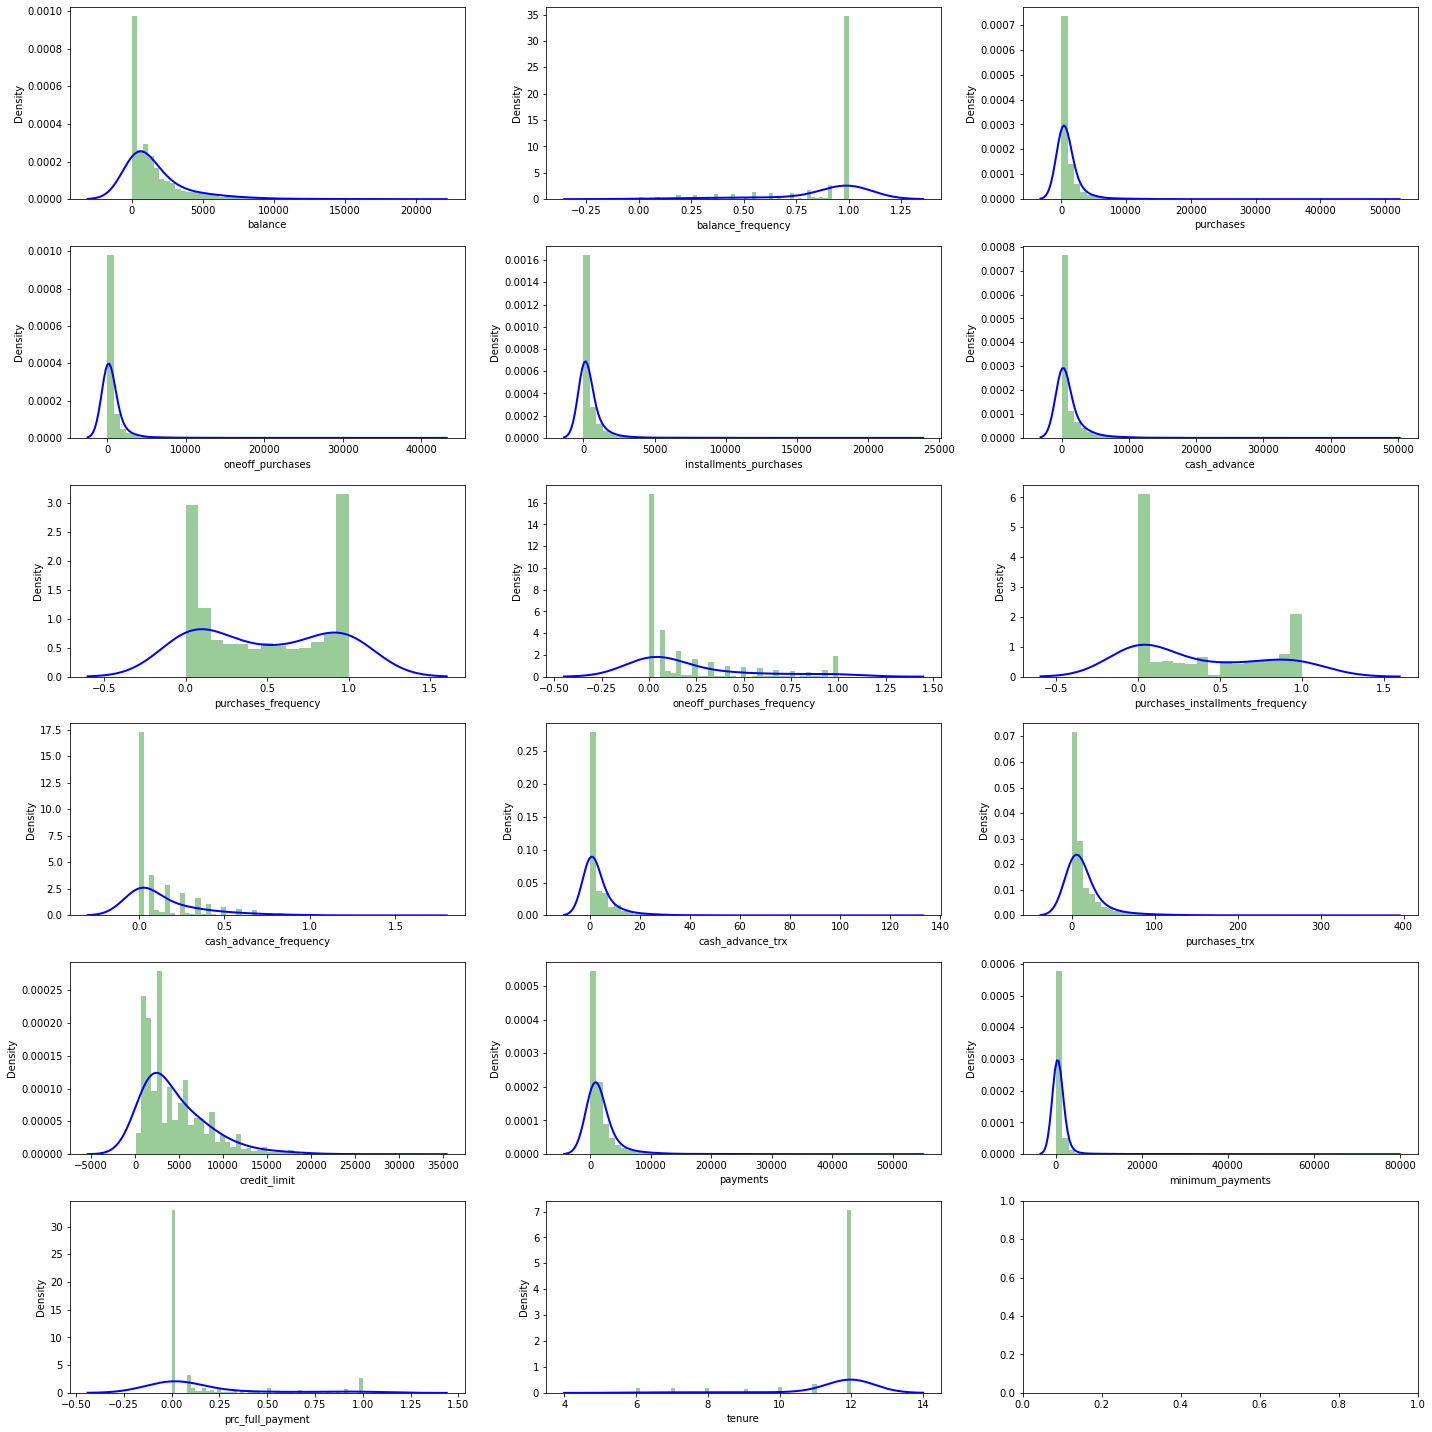

In [16]:
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20,20))
i = 0
j = 0
for col in df.columns:
    sns.distplot(df[col], kde_kws={'color':'b','bw': 0.5,'lw':2,'label':'KDE'},hist_kws={'color':'g'}, ax=ax[i][j])
    j+=1
    if j>2:
        i+=1
        j=0
    if i == 6:
        break
plt.tight_layout()
plt.show()

Most of our data has a right-skewed distribution. It means their median is kinda higher than its mean

In [17]:
df_fit = df.columns.tolist()
len(df_fit)

17

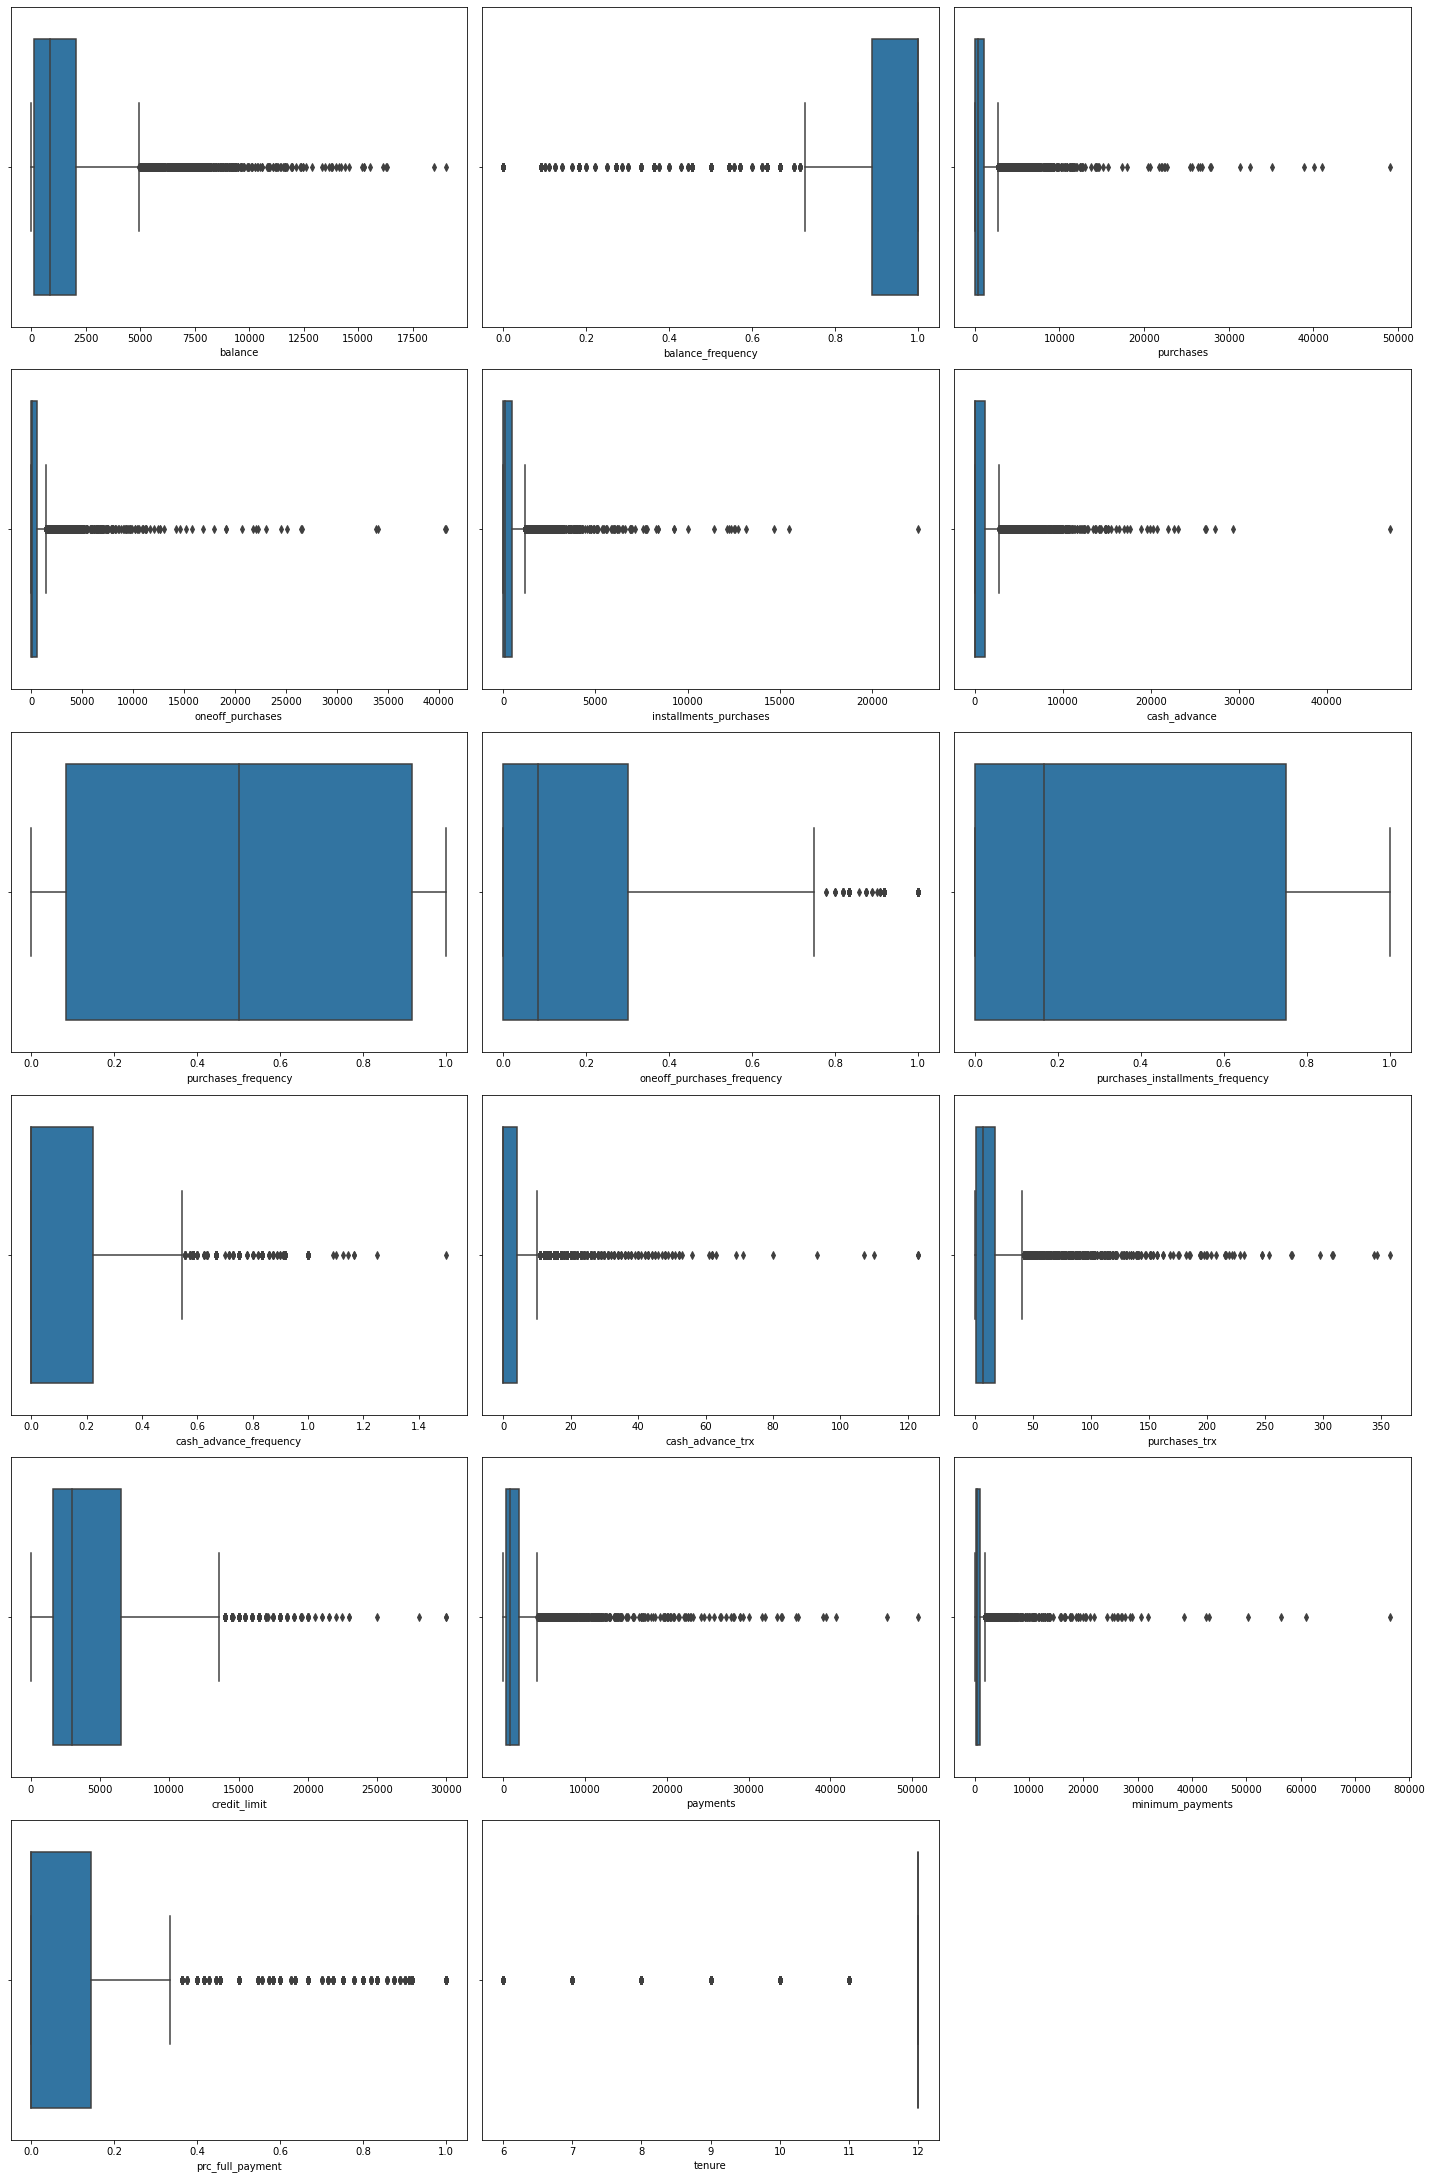

In [18]:
plt.figure(figsize=(20, 40))
for i in range(len(df_fit)):
    plt.subplot(len(df_fit)//2, 3, i + 1)
    sns.boxplot(
        x = df[df_fit[i]]
    )
plt.tight_layout()
plt.show()

From above we could see that most of the data have some outliers except **purchase_frequency, purchase_installments_frequency,** and **oneoff_purchase_frequency**.

**Quick Summary for Boxplot and Distplot**

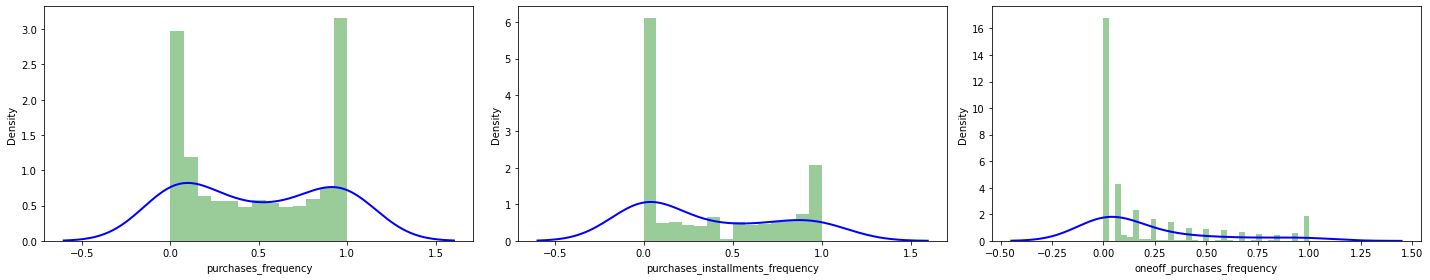

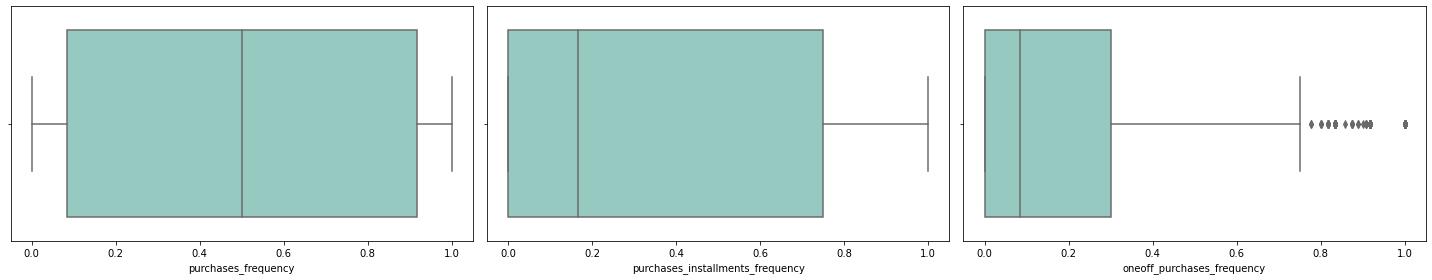

In [19]:
warnings.simplefilter(action='ignore', category=FutureWarning)
list_good = ['purchases_frequency', 'purchases_installments_frequency', 'oneoff_purchases_frequency']
plt.figure(figsize=(20, 4))
for i in range(len(list_good)):
    plt.subplot(len(list_good)//2, 3, i + 1)
    sns.distplot(df[list_good[i]], kde_kws={'color':'b','bw': 0.5,'lw':2,'label':'KDE'},hist_kws={'color':'g'})
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 4))
for i in range(len(list_good)):
    plt.subplot(len(list_good)//2, 3, i + 1)
    sns.boxplot(
        x = df[list_good[i]],
        palette="Set3"
    )
plt.tight_layout()
plt.show()

Some of our data has a few outliers. But look at the **purchase_frequency, purchase_installments_frequency,** and **oneoff_purchase_frequency** 

They have a good box plot !!

If we compare with the last graph which is distribution plot with kde, we could see that their distribution is almost tend to be normal. But for a few things they have some indentation that makes their kde looks like mountain

**Correlation**

In [20]:
correlations = df.corr()

<AxesSubplot:>

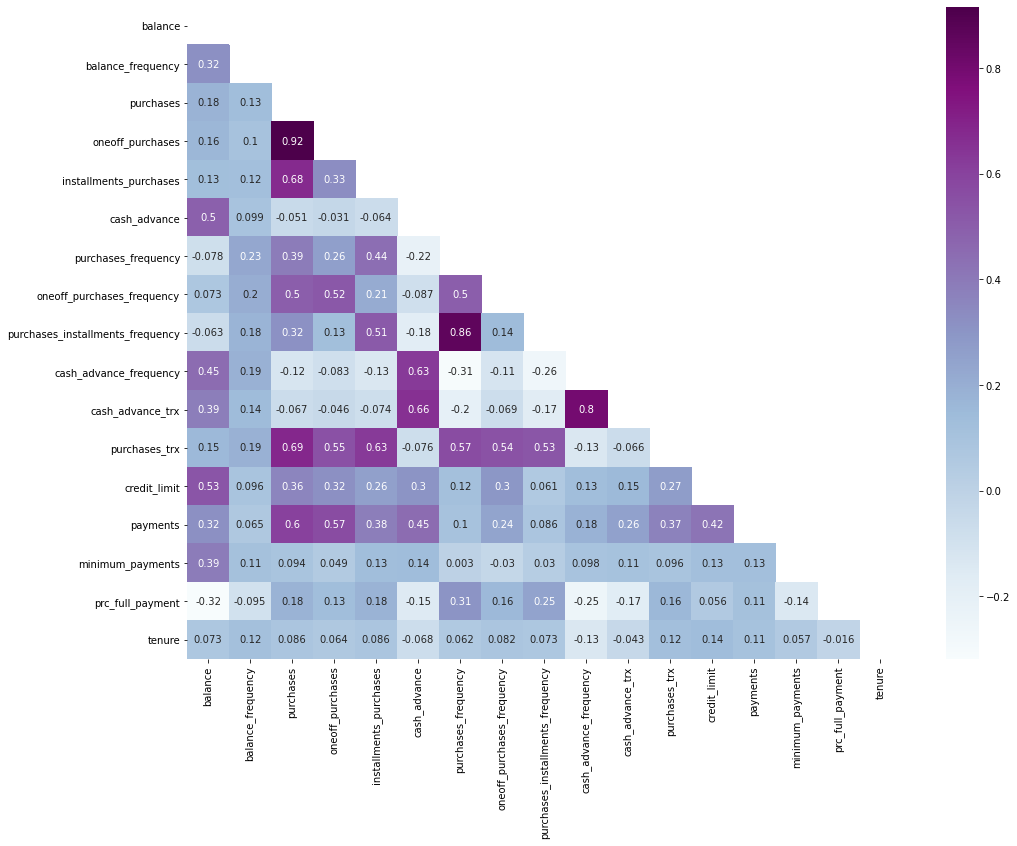

In [21]:
mask = np.triu(np.ones_like(correlations, dtype=bool))

plt.figure(figsize=(16,12))
sns.heatmap(correlations,mask=mask, cmap="BuPu", annot=True)

We could see above that some of our features have a correlation with others (look over the darker colors to see good correlation). That means we could do some Dimensional Reduction with PCA before we go to Clustering

After we do some little exploration about our data, we will continue to **Data Preprocessing**

## Data Preprocessing

**Multicollinearity Check**

In [22]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(df.values, i) for i in range(len(df.columns))]

vif_data

,feature,VIF
0,balance,4.104375
1,balance_frequency,18.117364
2,purchases,58774.018276
3,oneoff_purchases,32776.969005
4,installments_purchases,10399.664477
5,cash_advance,3.460516
6,purchases_frequency,26.451085
7,oneoff_purchases_frequency,5.712984
8,purchases_installments_frequency,17.330797
9,cash_advance_frequency,4.912292


From above we could see that there is almost 9 features that don't have any collinearity with others. That means we could do some reductional dimension for almost 8 dimension

**Scaling Data**

In [23]:
# Let's scale the data first
scaler = StandardScaler()

In [24]:
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8950, 17)

**PCA**

In [25]:
pca_scaled = PCA(n_components=17).fit(df_scaled)
pca_scaled.explained_variance_ratio_

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

In [26]:
pca_varbest = pca_scaled.explained_variance_ratio_[9:][0]

In [27]:
pca_cumsumbest = np.cumsum(pca_scaled.explained_variance_ratio_)[9:][0]

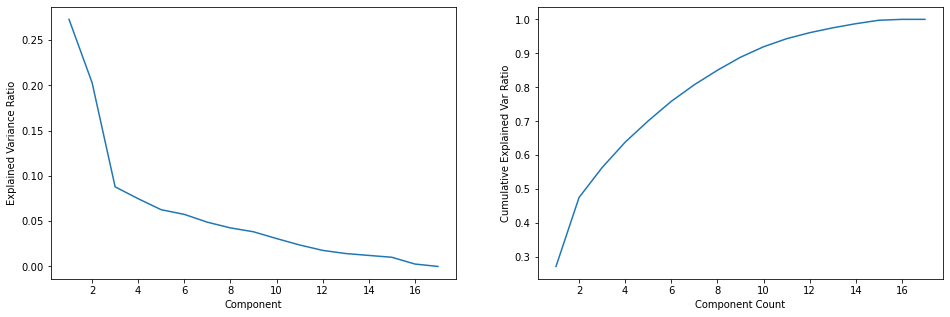

In [28]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,18),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Component Count')
ax[1].set_ylabel('Cumulative Explained Var Ratio')
plt.show()

From above, we could see some following informations :
- There is a gradual degradation of the EVR value from the first to the last component
- It looks like there is a fracture for 2 components. But if we take only 2 components in doing the reduction, it only has cumsum EVR < 0.5. That's not a good idea. If we look for 8 component and 10 component, it looks more promising since they have cumsum EVR $\geq$ 0.8

In [29]:
# mengambil 90% dari data asli
pca = PCA(n_components=0.90, whiten=True)
pca.fit(df_scaled)

print('Columns with 90% of total data : ', pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

Columns with 90% of total data :  10
0.9193051720273936


Just what we expected !! If we want to get 90% of the total data, we have to reduce the dimensions to 10 dimensions

<AxesSubplot:>

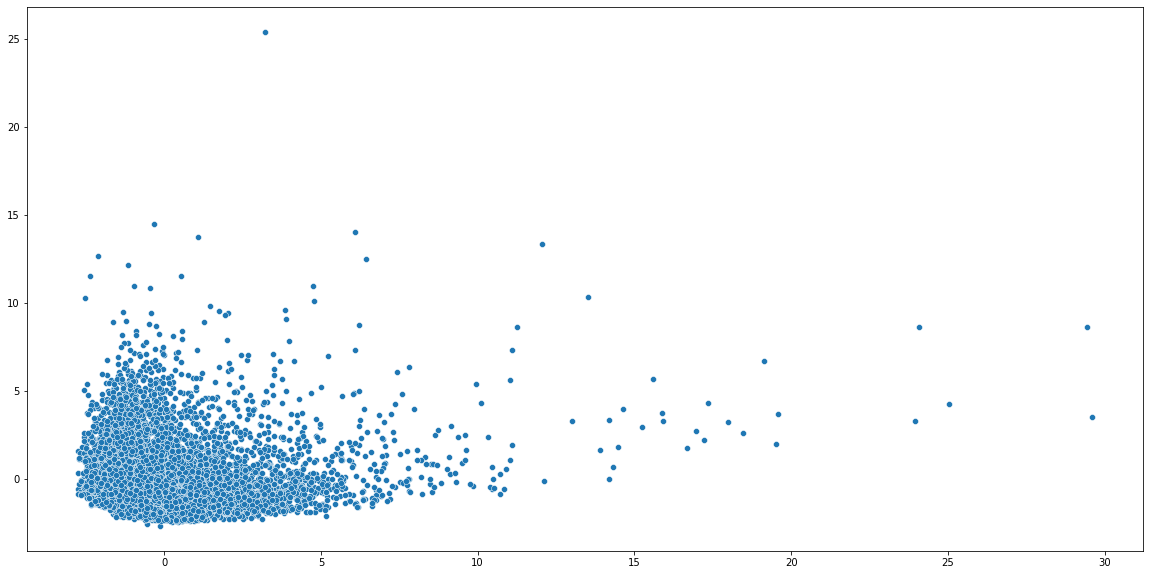

In [30]:
#Plot
plt.figure(figsize = (20,10))
df_10D = PCA(n_components = 10).fit_transform(df_scaled)
sns.scatterplot(x=df_10D[:,0],y=df_10D[:,1])

We could see that our data distribution is gathered in bottom left

## Define Model

In this section, we will define our model data

Our goal for this notebook is to clustering customer segmentation to define marketing strategy

We decide to use these model and then we will find out what is the best clustering for our goal :
- Model 1 : K-Means
- Model 2 : DBScan
- Model 3 : Agglomerative Clustering

### K-Means

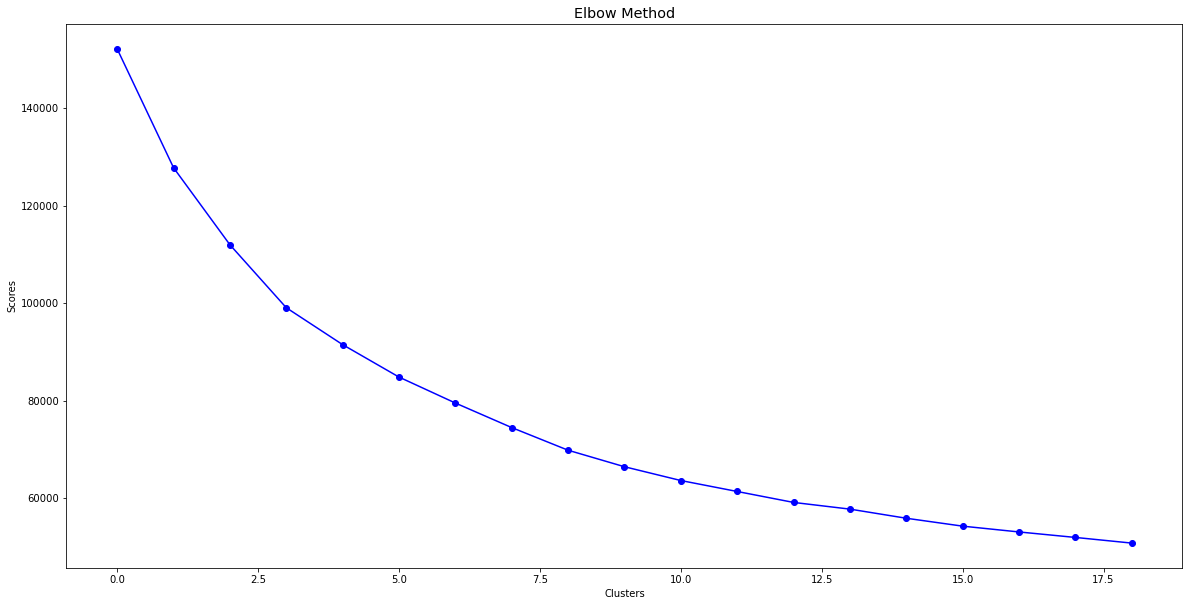

In [31]:
scores_1 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)
plt.figure(figsize = (20, 10))
plt.plot(scores_1, 'bo-')
plt.style.use('ggplot')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

From above, we could see that the elbow is on the 8th cluster. Why 8th cluster is our elbow ? It's because the value after 8th is tend to be linear, so we will use 8th as our cluster (K)

So we will use cluster 8 for our KMeans

In [32]:
# n_clusters berdasarkan PCA
kmeans = KMeans(n_clusters = 8, random_state=42)
kmeans.fit(df_10D)

KMeans(random_state=42)

### DBScan

In [33]:
dbs = DBSCAN(eps = 1, min_samples=300)
dbs.fit(df_10D)

DBSCAN(eps=1, min_samples=300)

### Agglomerative Clustering

In [34]:
agg = AC(n_clusters = 8, linkage = "ward").fit(df_10D)

## Data Evaluation

### KMeans

<AxesSubplot:>

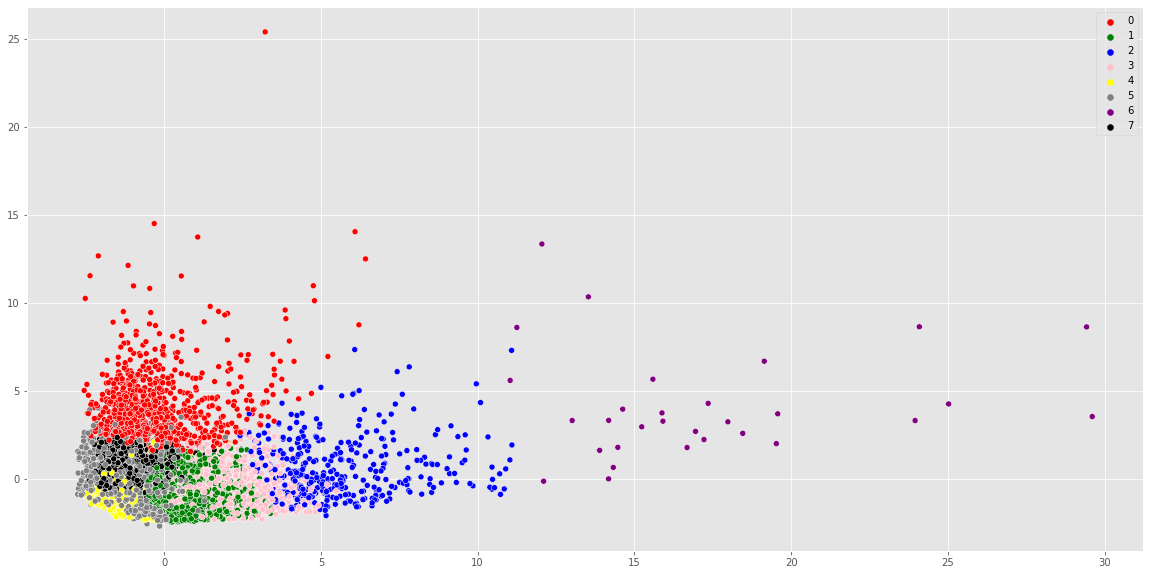

In [35]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = df_10D[:,0], y = df_10D[:,1], hue=kmeans.labels_, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])

Above is the scatter plot of KMeans with 8 Cluster

Now for evaluating the algorithms, we will use **Silhouette Method**

**Silhouette Method**

In [36]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 3 The average silhouette_score is : 0.2607375036892139
For n_clusters = 4 The average silhouette_score is : 0.21696932438329927
For n_clusters = 7 The average silhouette_score is : 0.2377137999211202
For n_clusters = 8 The average silhouette_score is : 0.24439201322625037


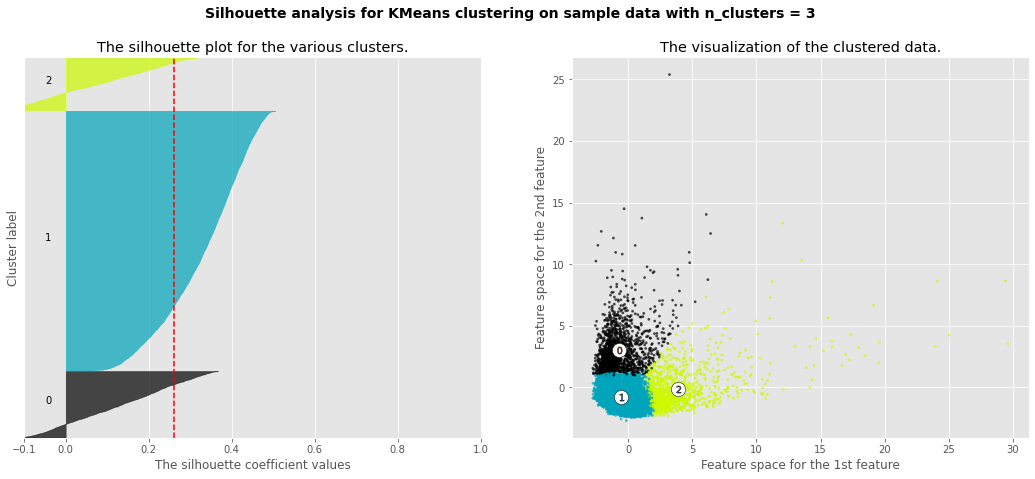

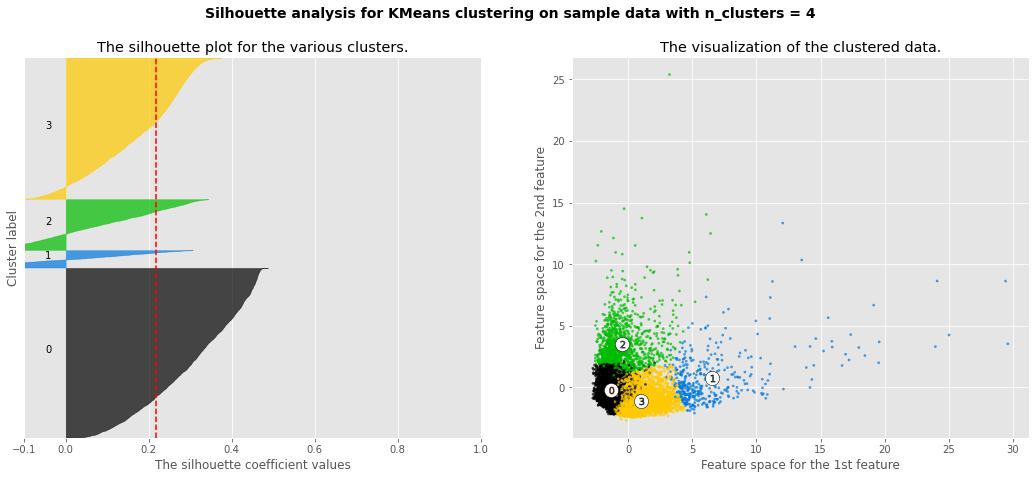

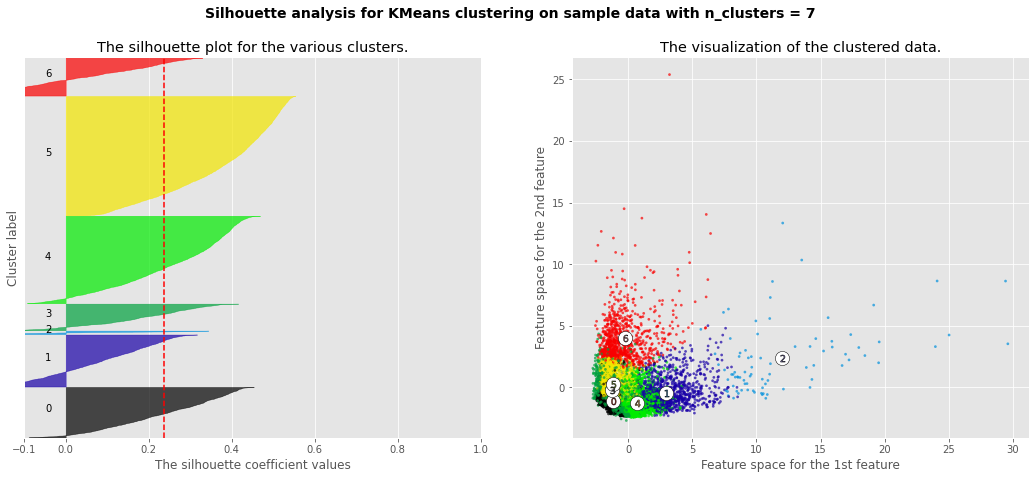

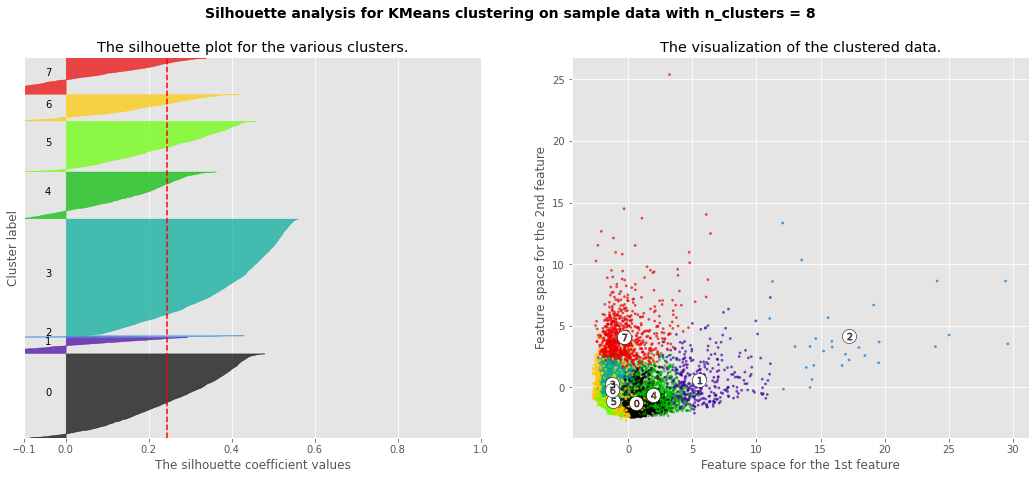

In [37]:
K =[3,4,7,8]
plot_silhouette(K, df_10D)

From silhouette graph above, we could see that the most optimal cluster is 3

Hmmm, so maybe our last cluster is not really good

Let's check all of the silhouette score from 2 until 8

Text(0, 0.5, 'Silhouette Score')

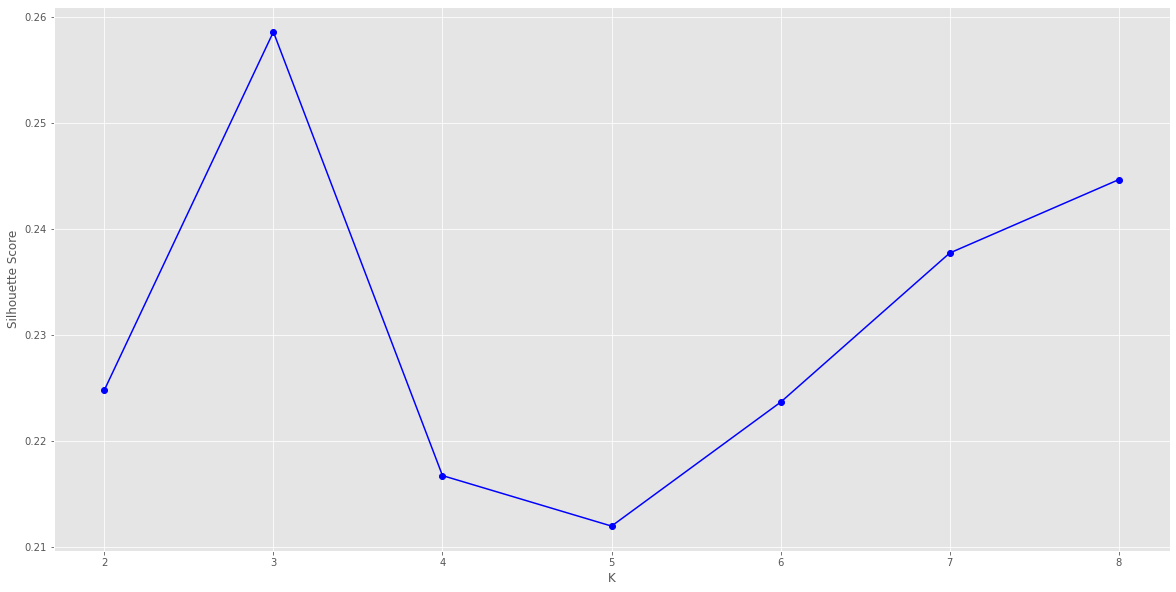

In [38]:
plt.figure(figsize = (20,10))
# Plotting silhouette score
K = [2,3,4,5,6,7,8]

s_score=[silhouette_score(df_10D, KMeans(n_clusters=i).fit(df_10D).labels_) for i in K]
plt.plot(K,s_score, 'bo-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

It turns out that 3rd cluster is the most optimal than 8th cluster (higher is better)

This mean we should change our K in the future

### DBScan

In [39]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="o", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

[ 0 -1 -1 ... -1 -1 -1]


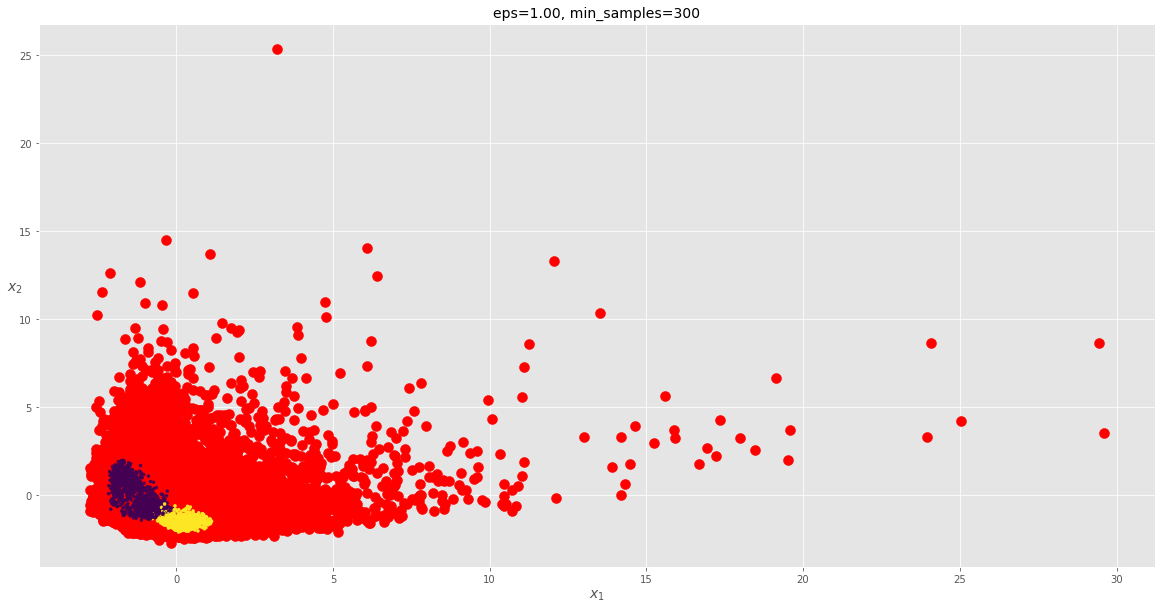

In [40]:
plt.figure(figsize = (20,10))
plot_dbscan(dbs,df_10D,size=10)
print(dbs.labels_)

In [41]:
# score default modelling
silhouette_score(df_10D, dbs.labels_)

-0.07671338616400473

From above we could see that DBScore divide cluster into 3 different class. And with 3 divided class, we got a small silhouette score which is -0.07

Not a problem

### Agglomerative Clustering

<AxesSubplot:>

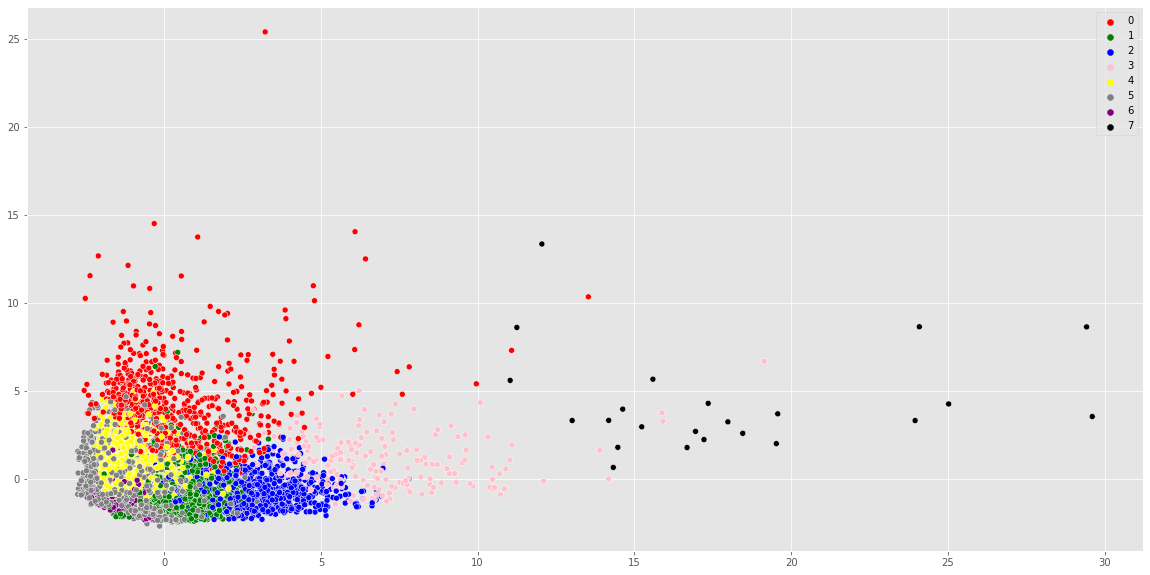

In [42]:
plt.figure(figsize = (20,10))
sns.scatterplot(x=df_10D[:,0],y=df_10D[:,1],hue=agg.labels_, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])

From figure above we could see that the scatterplot is almost the same as KMeans

In [43]:
# score default modelling
silhouette_score(df_10D, agg.labels_)

0.1878748560466724

Text(0, 0.5, 'AGG Silhouette Score')

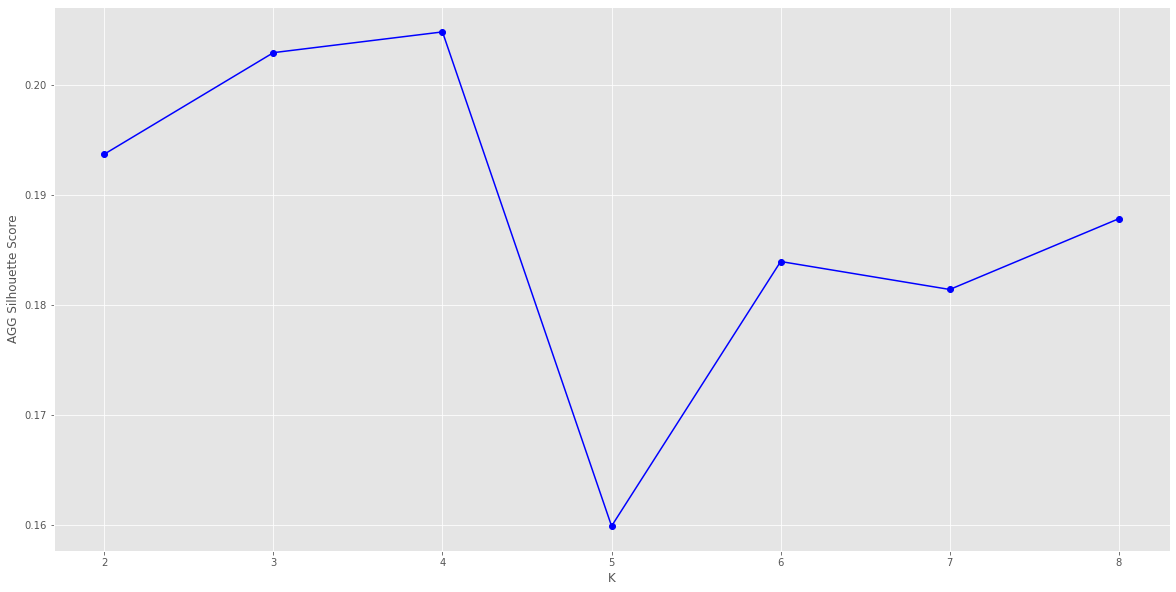

In [44]:
plt.figure(figsize = (20,10))
K = [2,3,4,5,6,7,8]

agg_score=[silhouette_score(df_10D, AC(n_clusters=i, linkage="ward").fit(df_10D).labels_) for i in K]
plt.plot(K, agg_score, 'bo-')
plt.xlabel('K')
plt.ylabel('AGG Silhouette Score')

In [45]:
K = [2,3,4,5,6,7,8]

agg_score=[silhouette_score(df_10D, AC(n_clusters=i, linkage="ward").fit(df_10D).labels_) for i in K]
print(agg_score)

[0.1937443251491667, 0.20297230449604658, 0.20485899565568536, 0.15992307507139325, 0.18398145167071556, 0.18143906690992176, 0.1878748560466724]


For this model, the most optimal score is 4 since it has the highest score

#### Summary

For 3 of our model, we use silhouette score for comparing which one is the best.

- KMeans most optimal score is with K = 3 and Silhouette Score = 0.26
- DBScan Silhouette Score = -0.076
- Agglomerative Clustering most optimal score is with K = 4 and Silhouette Score = 0.2048

For those results, we will choose the best one which is KMeans and use it for our next section (**Model Inference**)

## Model Inference

### KMeans

In [46]:
# n_clusters with result of silhouette score
kmeans_new = KMeans(n_clusters = 3, random_state=42)
kmeans_new.fit(df_10D)

KMeans(n_clusters=3, random_state=42)

In [47]:
labels = kmeans_new.labels_
# concatenate the new reduced clusters labels to our original dataframe
df_new = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_new.head().T

,0,1,2,3,4
balance,40.900749,3202.467416,2495.148862,1666.670542,817.714335
balance_frequency,0.818182,0.909091,1.000000,0.636364,1.000000
purchases,95.400000,0.000000,773.170000,1499.000000,16.000000
oneoff_purchases,0.000000,0.000000,773.170000,1499.000000,16.000000
installments_purchases,95.400000,0.000000,0.000000,0.000000,0.000000
cash_advance,0.000000,6442.945483,0.000000,205.788017,0.000000
purchases_frequency,0.166667,0.000000,1.000000,0.083333,0.083333
oneoff_purchases_frequency,0.000000,0.000000,1.000000,0.083333,0.083333
purchases_installments_frequency,0.083333,0.000000,0.000000,0.000000,0.000000
cash_advance_frequency,0.000000,0.250000,0.000000,0.083333,0.000000


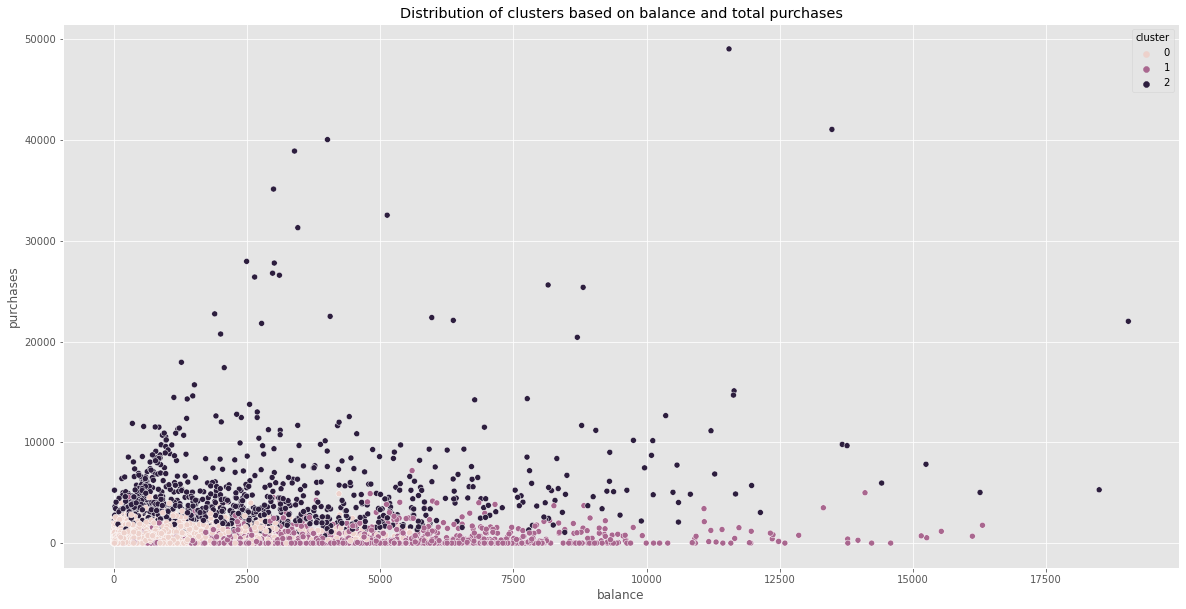

In [48]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_new, x='balance', y='purchases', hue='cluster')
plt.title('Distribution of clusters based on balance and total purchases')
plt.show()

We could see from above that the plot result is pretty good but it still have a small count of value that stack each other

If we can conclude from above, it seems like cluster number 2 is our main target object since even though they have little balance in their credit card or have a lot of balance in their credit card, the average purchase is still very high compared to other clusters

## Conclusion

From above, we could conclude these following things :
1. The Credit Card dataset has 18 columns and 8950 rows
2. Most of our data doesn't have normal distribution, it means their data is not normally distribute
3. **purchase_frequency, purchase_installments_frequency,** and **oneoff_purchase_frequency** has the better distribution compared to other features
4. After do some Silhouette Score, we got model that has the most optimal and best score. It is KMeans with K = 3
5. DBScan got -0.076 for Silhouette Score and DBScan with K = 4 got 0.204 Silhouette Score
6. From clustering, we get 3 types of cluster
    - Cluster 0 : Low balance and High Purchases
    - Cluster 1 : High balance and High Purchases
    - Cluster 2 : Low and High balance with High Purchases
7. With KMeans as our main model here, our model inference that clustered balance and purchase get some conclusion. 
    - Cluster number 2 is our main target, because the average customer purchases with varying levels of balance are still very high compared to other clusters